# L²Space and L2Function Demo: Comprehensive Guide

This notebook demonstrates the usage of the `L2Space` class for working with L² Hilbert spaces on intervals. 

## Mathematical Background

L² spaces are Hilbert spaces of square-integrable functions with the inner product:
$$⟨u,v⟩_{L²} = \int_a^b u(x)v(x) \, dx$$

Our implementation provides:
- **L² Hilbert spaces** on intervals [a,b] with Fourier basis functions
- **L2Function instances** that properly handle mathematical restrictions (e.g., point evaluation warnings)
- **Integration and coefficient transformations** between function and coefficient representations
- **Inner products and norms** computed via numerical integration

Let's explore all the functionality step by step!

## 1. Import Required Libraries

We'll import NumPy for numerical operations, matplotlib for plotting, and our L2Space classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the pygeoinf package to path
sys.path.append('/disks/data/PhD/Inferences/pygeoinf')

# Import our L2 space classes
from pygeoinf.interval.l2_space import L2Space
from pygeoinf.interval.l2_functions import L2Function

print("Successfully imported all required libraries!")
print("Ready to work with L² spaces!")

Successfully imported all required libraries!
Ready to work with L² spaces!


## 2. Create L2Space Instances

Let's create L² Hilbert spaces with different configurations:
- Different dimensions (number of basis functions)
- Different intervals (domains)
- Periodic boundary conditions with Fourier basis

In [2]:
# Create a simple L2 space on [0, 1] with 5 basis functions
space1 = L2Space(5, basis_type='fourier', interval=(0, 1))
print(f"Space 1: dimension={space1.dim}, interval={space1.interval}")
print(f"Boundary conditions: {space1.boundary_conditions}")

# Create L2 space on [0, 2π] with 7 basis functions
space2 = L2Space(7, basis_type='fourier', interval=(0, 2*np.pi))
print(f"\nSpace 2: dimension={space2.dim}, interval={space2.interval}")
print(f"Boundary conditions: {space2.boundary_conditions}")

# Create L2 space on [-1, 1] with 9 basis functions
space3 = L2Space(9, basis_type='fourier', interval=(-1, 1))
print(f"\nSpace 3: dimension={space3.dim}, interval={space3.interval}")
print(f"Boundary conditions: {space3.boundary_conditions}")

print(f"\nAll spaces use basis type: {space1._basis_type}")
print(f"Space 1 length: {space1._length}")
print(f"Space 2 length: {space2._length}")
print(f"Space 3 length: {space3._length}")

Space 1: dimension=5, interval=(0, 1)
Boundary conditions: {'type': 'periodic'}

Space 2: dimension=7, interval=(0, 6.283185307179586)
Boundary conditions: {'type': 'periodic'}

Space 3: dimension=9, interval=(-1, 1)
Boundary conditions: {'type': 'periodic'}

All spaces use basis type: fourier
Space 1 length: 1
Space 2 length: 6.283185307179586
Space 3 length: 2


/disks/data/PhD/Inferences/pygeoinf/pygeoinf/interval/l2_functions.py:249: UserWarning: Point evaluation is not well-defined for general L² functions. Consider using a Sobolev space with s > 1/2 for point evaluation.
  warnings.warn(


## 3. Explore Basis Functions

Let's examine the Fourier basis functions that form our L² space. For periodic boundary conditions, we get:
- Constant function (k=0)
- Cosine and sine functions with increasing frequencies

In [3]:
# Examine basis functions for space1
print(f"Space1 has {len(space1.basis_functions)} basis functions:")
for i, basis_func in enumerate(space1.basis_functions):
    print(f"  Basis {i}: {basis_func.name}")

# Look at the Gram matrix (should be approximately identity for orthonormal basis)
print(f"\nGram matrix shape: {space1.gram_matrix.shape}")
print("Gram matrix (should be close to identity for orthonormal basis):")
print(np.round(space1.gram_matrix, 4))

# Check if basis functions are approximately orthonormal
print(f"\nIs Gram matrix close to identity? {np.allclose(space1.gram_matrix, np.eye(space1.dim), atol=1e-10)}")

# Examine basis functions for space2 (larger space)
print(f"\nSpace2 basis functions:")
for i, basis_func in enumerate(space2.basis_functions):
    print(f"  Basis {i}: {basis_func.name}")

Space1 has 5 basis functions:
  Basis 0: constant
  Basis 1: cos_1
  Basis 2: sin_1
  Basis 3: cos_2
  Basis 4: sin_2

Gram matrix shape: (5, 5)
Gram matrix (should be close to identity for orthonormal basis):
[[ 1. -0. -0. -0. -0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0.  1. -0.  0.]
 [-0. -0. -0.  1. -0.]
 [-0. -0.  0. -0.  1.]]

Is Gram matrix close to identity? False

Space2 basis functions:
  Basis 0: constant
  Basis 1: cos_1
  Basis 2: sin_1
  Basis 3: cos_2
  Basis 4: sin_2
  Basis 5: cos_3
  Basis 6: sin_3


## 4. Create and Manipulate L2 Functions

Now let's create L2Function instances in different ways:
1. Using coefficient arrays
2. Using evaluation callables
3. Performing arithmetic operations

In [4]:
# Method 1: Create function using coefficients
coeffs1 = np.array([1.0, 0.0, 0.5, 0.0, 0.3])  # Coefficients for basis functions
func1 = L2Function(space1, coefficients=coeffs1, name="func1_from_coeffs")
print(f"Created function: {func1.name}")
print(f"Coefficients: {func1.coefficients}")

# Method 2: Create function using evaluation callable
def my_test_function(x):
    """A simple test function: sin(2πx)"""
    return np.sin(2 * np.pi * x)

func2 = L2Function(space1, evaluate_callable=my_test_function, name="sin_function")
print(f"\nCreated function: {func2.name}")

# Method 3: Get individual basis functions and combine them
basis_0 = space1.basis_functions[0]  # Constant
basis_1 = space1.basis_functions[1]  # First cosine
basis_2 = space1.basis_functions[2]  # First sine

# Create a linear combination manually
func3 = 2.0 * basis_0 + 1.5 * basis_1 + 0.8 * basis_2
func3.name = "manual_combination"
print(f"\nCreated function: {func3.name}")

# Test arithmetic operations
func_sum = func1 + func2
func_sum.name = "sum_function"
print(f"\nArithmetic operations successful!")
print(f"func1 + func2 = {func_sum.name}")

# Test scalar multiplication
func_scaled = 2.0 * func1
func_scaled.name = "scaled_function"
print(f"2.0 * func1 = {func_scaled.name}")

Created function: func1_from_coeffs
Coefficients: [1.  0.  0.5 0.  0.3]

Created function: sin_function

Created function: manual_combination

Arithmetic operations successful!
func1 + func2 = sum_function
2.0 * func1 = scaled_function


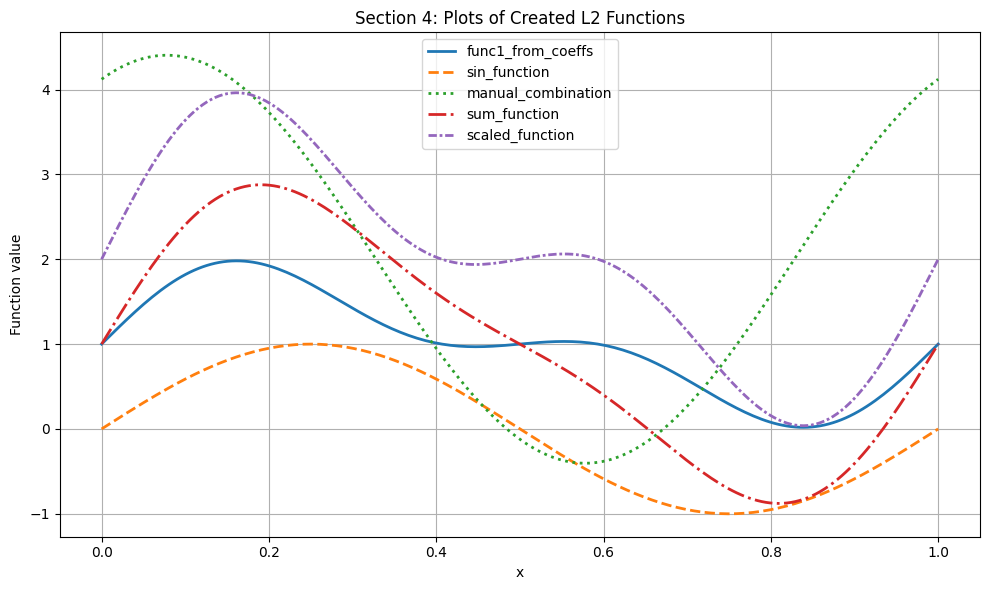

In [5]:
# Plot all functions created in section 4
x_plot = np.linspace(space1.interval[0], space1.interval[1], 200)
plt.figure(figsize=(10, 6))

# Evaluate and plot each function
for f, label, style in [
    (func1, 'func1_from_coeffs', '-'),
    (func2, 'sin_function', '--'),
    (func3, 'manual_combination', ':'),
    (func_sum, 'sum_function', '-.'),
    (func_scaled, 'scaled_function', (0, (3, 1, 1, 1)))]:
    try:
        y = f.evaluate(x_plot)
        plt.plot(x_plot, y, linestyle=style, label=label, linewidth=2)
    except Exception as e:
        print(f"Could not plot {label}: {e}")

plt.title("Section 4: Plots of Created L2 Functions")
plt.xlabel("x")
plt.ylabel("Function value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.5. Working with Compact Support

L2Functions now support **compact support**, meaning functions that are zero outside specified intervals. This is mathematically important and computationally efficient for:
- Functions with localized behavior
- FEM basis functions (hat functions)
- Piecewise-defined functions
- Efficient integration over limited domains

Let's explore single-interval and multi-interval compact support functionality.

In [6]:
# Create a space on a larger interval for better visualization
compact_space = L2Space(10, interval=(0, 10))

# Example 1: Single-interval compact support (backward compatible)
def gaussian_like(x):
    """A smooth function that we'll restrict to compact support"""
    return np.exp(-(x-3)**2) * np.sin(2*np.pi*x)

# Create function with compact support on [2, 4]
func_compact_single = L2Function(
    compact_space,
    evaluate_callable=gaussian_like,
    support=(2, 4),  # Single tuple - backward compatible
    name="Single-interval support"
)

print(f"Function with single-interval support:")
print(f"  Support: {func_compact_single.support}")
print(f"  Has compact support: {func_compact_single.has_compact_support}")

# Test that function is zero outside support
test_points = [1.0, 2.5, 3.0, 3.5, 5.0]
print(f"\nFunction values at test points:")
for x in test_points:
    is_zero = func_compact_single.is_zero_at(x)
    value = func_compact_single.evaluate(x)
    print(f"  x={x}: is_zero={is_zero}, f(x)={value:.4f}")

Function with single-interval support:
  Support: [(2, 4)]
  Has compact support: True

Function values at test points:
  x=1.0: is_zero=True, f(x)=0.0000
  x=2.5: is_zero=False, f(x)=0.0000
  x=3.0: is_zero=False, f(x)=-0.0000
  x=3.5: is_zero=False, f(x)=0.0000
  x=5.0: is_zero=True, f(x)=0.0000


In [7]:
# Example 2: Multi-interval compact support
def oscillating_func(x):
    """Function that we'll restrict to multiple intervals"""
    return np.cos(3*np.pi*x) * np.exp(-0.2*x)

# Create function with support on multiple disjoint intervals
multi_intervals = [(1, 2), (4, 5), (7, 8.5)]
func_compact_multi = L2Function(
    compact_space,
    evaluate_callable=oscillating_func,
    support=multi_intervals,  # List of tuples for multi-interval
    name="Multi-interval support"
)

print(f"\nFunction with multi-interval support:")
print(f"  Support: {func_compact_multi.support}")
print(f"  Number of support intervals: {len(func_compact_multi.support)}")

# Test function values across the domain
test_points_multi = [0.5, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0]
print(f"\nFunction values at various points:")
for x in test_points_multi:
    is_zero = func_compact_multi.is_zero_at(x)
    value = func_compact_multi.evaluate(x)
    status = "inside support" if not is_zero else "outside support"
    print(f"  x={x}: f(x)={value:.4f} ({status})")


Function with multi-interval support:
  Support: [(1, 2), (4, 5), (7, 8.5)]
  Number of support intervals: 3

Function values at various points:
  x=0.5: f(x)=0.0000 (outside support)
  x=1.5: f(x)=0.0000 (inside support)
  x=3.0: f(x)=0.0000 (outside support)
  x=4.5: f(x)=-0.0000 (inside support)
  x=6.0: f(x)=0.0000 (outside support)
  x=7.5: f(x)=0.0000 (inside support)
  x=9.0: f(x)=0.0000 (outside support)


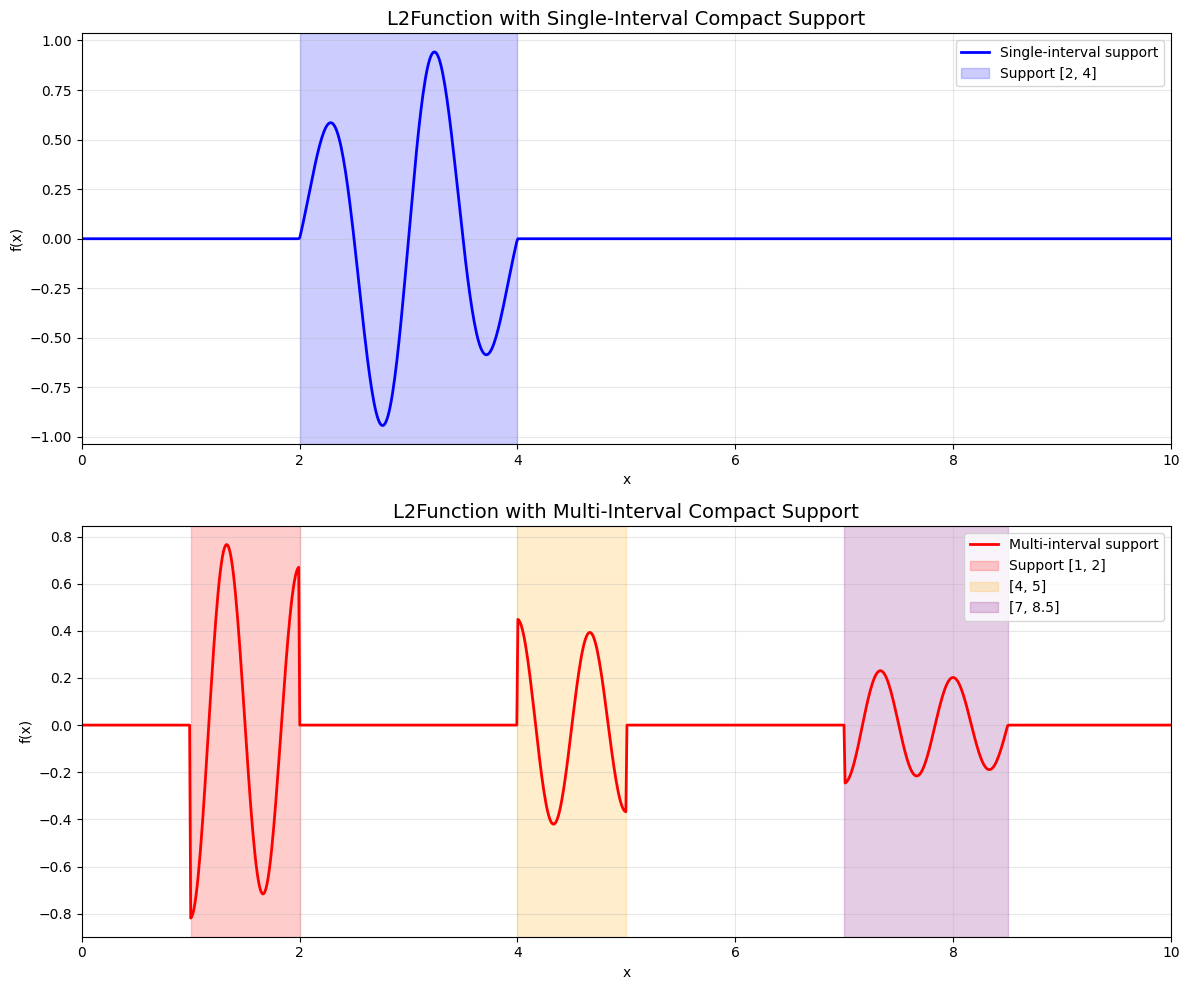

Notice how functions are exactly zero outside their support intervals!


In [8]:
# Visualization: Plot both compact support functions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
x_vis = np.linspace(0, 10, 1000)

# Plot single-interval compact support function
y_single = func_compact_single.evaluate(x_vis)
ax1.plot(x_vis, y_single, 'b-', linewidth=2, label=func_compact_single.name)

# Highlight support interval
support_a, support_b = func_compact_single.support[0]  # First (and only) interval
ax1.axvspan(support_a, support_b, alpha=0.2, color='blue', label=f'Support [{support_a}, {support_b}]')

ax1.set_title('L2Function with Single-Interval Compact Support', fontsize=14)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 10)

# Plot multi-interval compact support function
y_multi = func_compact_multi.evaluate(x_vis)
ax2.plot(x_vis, y_multi, 'r-', linewidth=2, label=func_compact_multi.name)

# Highlight all support intervals
colors = ['red', 'orange', 'purple']
for i, (a, b) in enumerate(func_compact_multi.support):
    color = colors[i % len(colors)]
    ax2.axvspan(a, b, alpha=0.2, color=color,
                label=f'Support [{a}, {b}]' if i == 0 else f'[{a}, {b}]')

ax2.set_title('L2Function with Multi-Interval Compact Support', fontsize=14)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 10)

plt.tight_layout()
plt.show()

print("Notice how functions are exactly zero outside their support intervals!")

In [9]:
# Example 3: Arithmetic with Compact Support Functions

# Addition: Support becomes the UNION of individual supports
func_sum_compact = func_compact_single + func_compact_multi
func_sum_compact.name = "Sum (Union Support)"

print(f"Compact Support Arithmetic:")
print(f"  Single support: {func_compact_single.support}")
print(f"  Multi support:  {func_compact_multi.support}")
print(f"  Sum support:    {func_sum_compact.support}")
print(f"  → Addition creates UNION of supports")

# Create two functions with overlapping support for multiplication demo
def func_a(x):
    return np.sin(np.pi * x)

def func_b(x):
    return np.cos(2 * np.pi * x)

func_overlap_1 = L2Function(compact_space, evaluate_callable=func_a,
                           support=[(2, 6), (8, 9)], name="Overlap func 1")
func_overlap_2 = L2Function(compact_space, evaluate_callable=func_b,
                           support=[(4, 7), (8.5, 9.5)], name="Overlap func 2")

# Multiplication: Support becomes the INTERSECTION of individual supports
func_product_compact = func_overlap_1 * func_overlap_2
func_product_compact.name = "Product (Intersection Support)"

print(f"\n  Overlap 1 support: {func_overlap_1.support}")
print(f"  Overlap 2 support: {func_overlap_2.support}")
print(f"  Product support:   {func_product_compact.support}")
print(f"  → Multiplication creates INTERSECTION of supports")

Compact Support Arithmetic:
  Single support: [(2, 4)]
  Multi support:  [(1, 2), (4, 5), (7, 8.5)]
  Sum support:    [(1, 5), (7, 8.5)]
  → Addition creates UNION of supports

  Overlap 1 support: [(2, 6), (8, 9)]
  Overlap 2 support: [(4, 7), (8.5, 9.5)]
  Product support:   [(4, 6), (8.5, 9)]
  → Multiplication creates INTERSECTION of supports


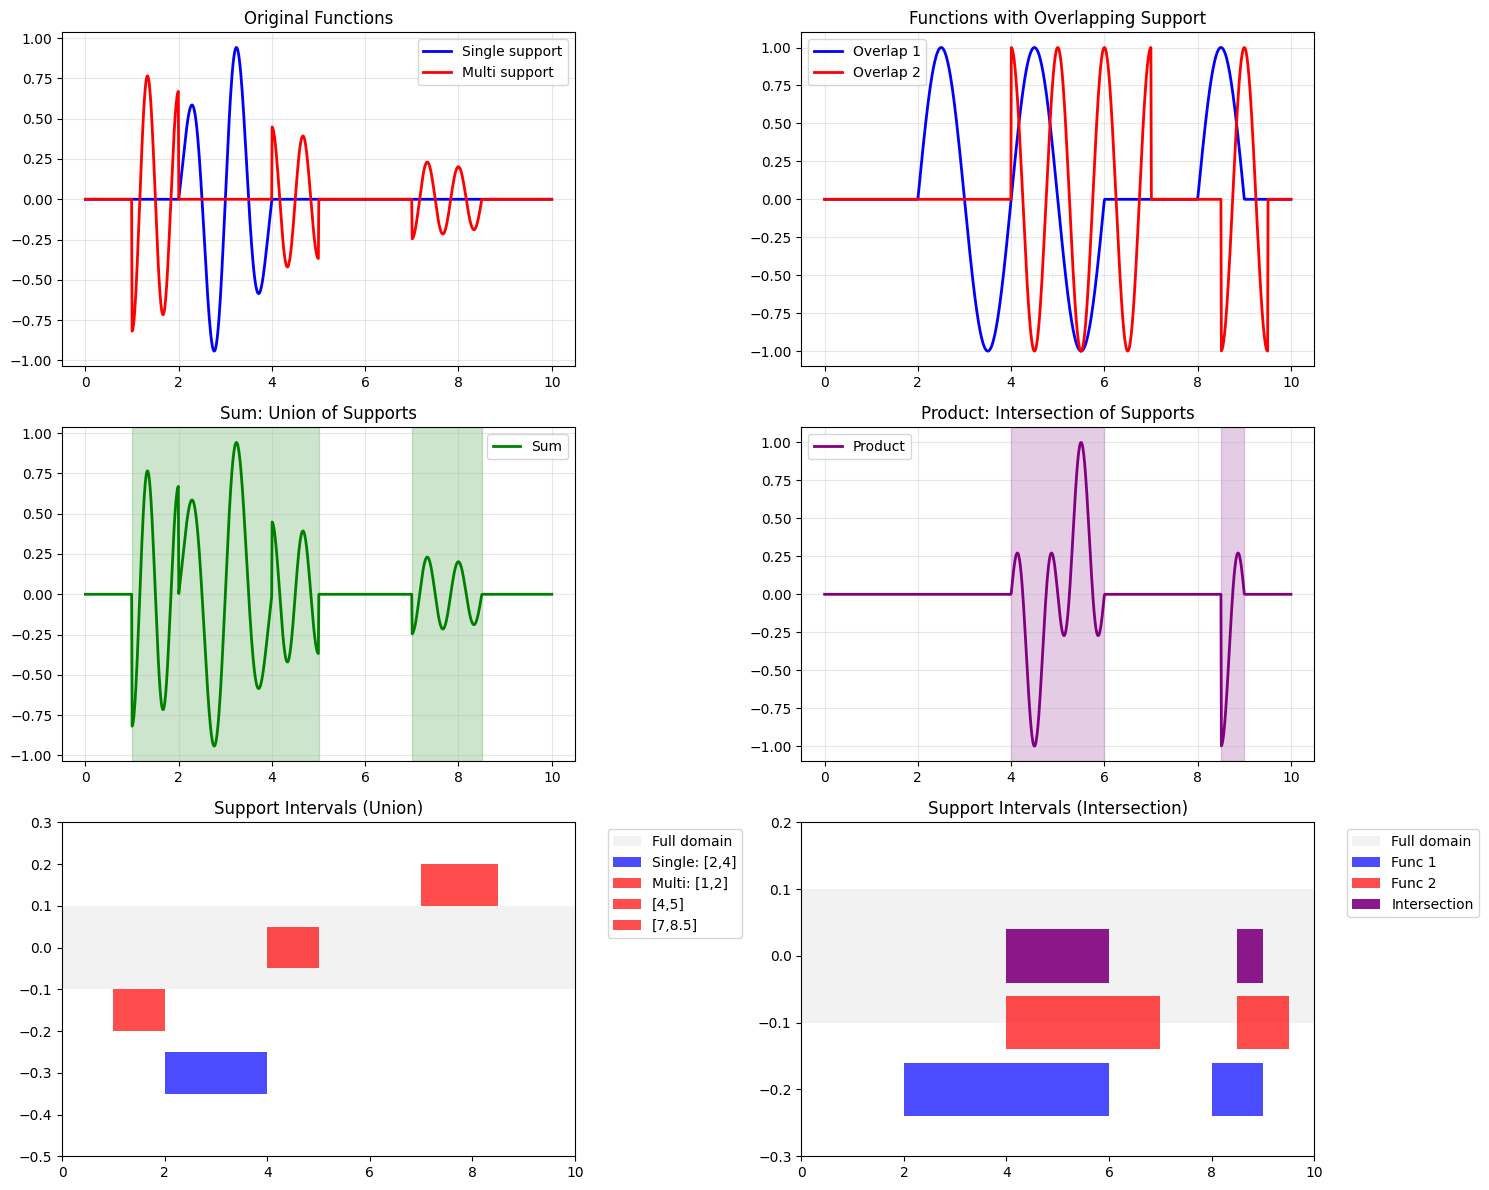

Key insights:
• Addition: f + g has support on UNION of individual supports
• Multiplication: f * g has support on INTERSECTION of individual supports
• Functions are exactly zero outside their support intervals


In [10]:
# Visualize support union and intersection operations
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
x_vis = np.linspace(0, 10, 1000)

# Left column: Addition (Union)
# Plot original functions
axes[0,0].plot(x_vis, func_compact_single.evaluate(x_vis), 'b-', linewidth=2, label='Single support')
axes[0,0].plot(x_vis, func_compact_multi.evaluate(x_vis), 'r-', linewidth=2, label='Multi support')
axes[0,0].set_title('Original Functions', fontsize=12)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot sum
axes[1,0].plot(x_vis, func_sum_compact.evaluate(x_vis), 'g-', linewidth=2, label='Sum')
for a, b in func_sum_compact.support:
    axes[1,0].axvspan(a, b, alpha=0.2, color='green')
axes[1,0].set_title('Sum: Union of Supports', fontsize=12)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Support diagram for union
axes[2,0].barh([0], [10], height=0.2, alpha=0.1, color='gray', label='Full domain')
y_pos = 0
colors_union = ['blue', 'red', 'red', 'red']
labels_union = ['Single: [2,4]', 'Multi: [1,2]', '[4,5]', '[7,8.5]']
supports_union = [(2,4), (1,2), (4,5), (7,8.5)]

for i, ((a,b), color, label) in enumerate(zip(supports_union, colors_union, labels_union)):
    axes[2,0].barh([y_pos + i*0.15 - 0.3], [b-a], left=a, height=0.1,
                   color=color, alpha=0.7, label=label)

axes[2,0].set_xlim(0, 10)
axes[2,0].set_ylim(-0.5, 0.3)
axes[2,0].set_title('Support Intervals (Union)', fontsize=12)
axes[2,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Right column: Multiplication (Intersection)
# Plot overlap functions
axes[0,1].plot(x_vis, func_overlap_1.evaluate(x_vis), 'b-', linewidth=2, label='Overlap 1')
axes[0,1].plot(x_vis, func_overlap_2.evaluate(x_vis), 'r-', linewidth=2, label='Overlap 2')
axes[0,1].set_title('Functions with Overlapping Support', fontsize=12)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot product
axes[1,1].plot(x_vis, func_product_compact.evaluate(x_vis), 'purple', linewidth=2, label='Product')
for a, b in func_product_compact.support:
    axes[1,1].axvspan(a, b, alpha=0.2, color='purple')
axes[1,1].set_title('Product: Intersection of Supports', fontsize=12)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Support diagram for intersection
axes[2,1].barh([0], [10], height=0.2, alpha=0.1, color='gray', label='Full domain')
y_pos = 0

# Original supports
func1_supports = [(2,6), (8,9)]
func2_supports = [(4,7), (8.5,9.5)]
intersection_supports = [(4,6), (8.5,9)]

for i, (a,b) in enumerate(func1_supports):
    axes[2,1].barh([y_pos - 0.2], [b-a], left=a, height=0.08,
                   color='blue', alpha=0.7, label='Func 1' if i==0 else "")

for i, (a,b) in enumerate(func2_supports):
    axes[2,1].barh([y_pos - 0.1], [b-a], left=a, height=0.08,
                   color='red', alpha=0.7, label='Func 2' if i==0 else "")

for i, (a,b) in enumerate(intersection_supports):
    axes[2,1].barh([y_pos], [b-a], left=a, height=0.08,
                   color='purple', alpha=0.9, label='Intersection' if i==0 else "")

axes[2,1].set_xlim(0, 10)
axes[2,1].set_ylim(-0.3, 0.2)
axes[2,1].set_title('Support Intervals (Intersection)', fontsize=12)
axes[2,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("Key insights:")
print("• Addition: f + g has support on UNION of individual supports")
print("• Multiplication: f * g has support on INTERSECTION of individual supports")
print("• Functions are exactly zero outside their support intervals")

In [11]:
# Example 4: Efficient Integration with Compact Support

# Create a constant function on multiple intervals for clear integration demo
def constant_func(x):
    return 3.0 * np.ones_like(x)

support_intervals = [(1, 2), (4, 5), (7, 8)]
func_constant_multi = L2Function(
    compact_space,
    evaluate_callable=constant_func,
    support=support_intervals,
    name="Constant on multi-intervals"
)

print(f"Integration Efficiency Demo:")
print(f"Function value: 3.0 (constant)")
print(f"Support intervals: {support_intervals}")

# Compute integral - automatically only integrates over support
integral_efficient = func_constant_multi.integrate(method='simpson')

# Expected integral: 3.0 * (total length of support intervals)
total_support_length = sum(b - a for a, b in support_intervals)
expected_integral = 3.0 * total_support_length

print(f"\nIntegral over support intervals: {integral_efficient:.6f}")
print(f"Expected (3.0 × {total_support_length}): {expected_integral:.6f}")
print(f"Error: {abs(integral_efficient - expected_integral):.10f}")

# Compare computational efficiency
print(f"\nComputational Efficiency:")
print(f"• Support covers {total_support_length}/{compact_space.domain.b - compact_space.domain.a} = {100*total_support_length/10:.1f}% of domain")
print(f"• Integration is ~{10/total_support_length:.1f}× more efficient than full domain integration")

# Demo with a more complex function
def complex_func(x):
    return np.sin(5*np.pi*x) * np.exp(-x**2/4)

func_complex_compact = L2Function(
    compact_space,
    evaluate_callable=complex_func,
    support=[(2, 3), (6, 7.5)],
    name="Complex function with compact support"
)

integral_complex = func_complex_compact.integrate(method='simpson')
print(f"\nComplex function integral over compact support: {integral_complex:.6f}")

Integration Efficiency Demo:
Function value: 3.0 (constant)
Support intervals: [(1, 2), (4, 5), (7, 8)]

Integral over support intervals: 9.000000
Expected (3.0 × 3): 9.000000
Error: 0.0000000000

Computational Efficiency:
• Support covers 3/10.0 = 30.0% of domain
• Integration is ~3.3× more efficient than full domain integration

Complex function integral over compact support: 0.030042


Created 4 FEM-style hat functions:
  Hat φ_1: support = [1.2, 2.8]
  Hat φ_2: support = [3.2, 4.8]
  Hat φ_3: support = [5.2, 6.8]
  Hat φ_4: support = [7.2, 8.8]


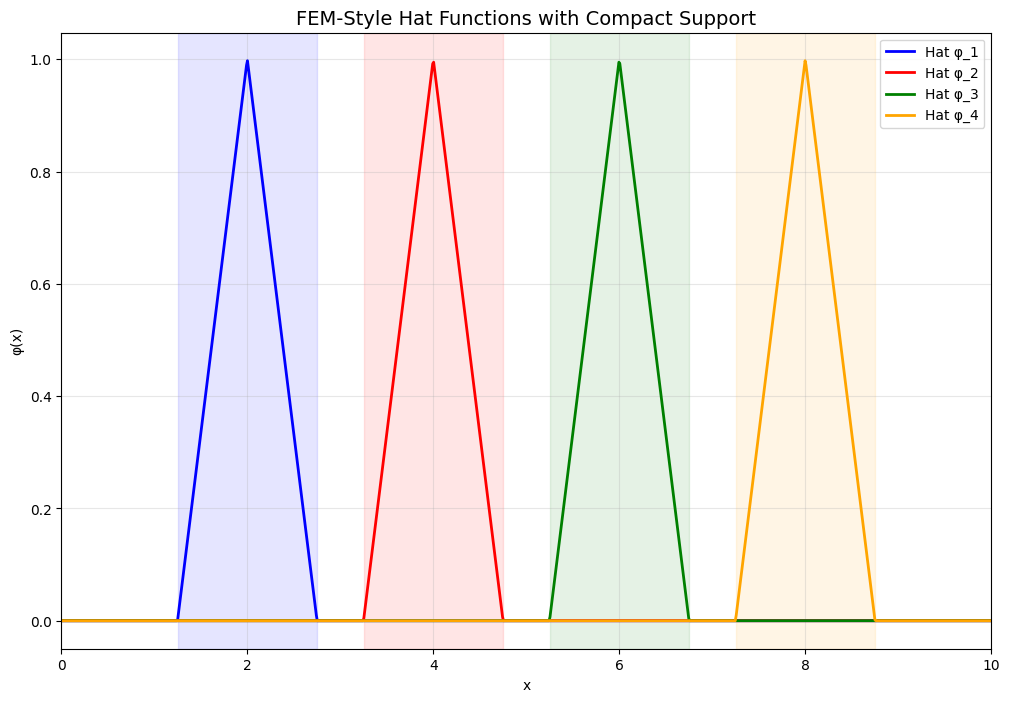


Key properties of hat functions:
• Each function has compact support (triangular basis)
• Functions have limited overlap (local interaction)
• Maximum value is 1.0 at the center
• Essential for efficient FEM computations


In [12]:
# Example 5: FEM-Style Hat Functions with Compact Support

# Create triangular "hat" functions like those used in FEM
def create_hat_function(center, width):
    """Create a triangular hat function centered at 'center' with given width"""
    def hat_func(x):
        x = np.asarray(x)
        result = np.zeros_like(x, dtype=float)

        # Left side of triangle
        left_mask = (x >= center - width/2) & (x <= center)
        result[left_mask] = (x[left_mask] - (center - width/2)) / (width/2)

        # Right side of triangle
        right_mask = (x > center) & (x <= center + width/2)
        result[right_mask] = ((center + width/2) - x[right_mask]) / (width/2)

        return result
    return hat_func

# Create several hat functions with compact support
hat_centers = [2, 4, 6, 8]
hat_width = 1.5
hat_functions = []

for i, center in enumerate(hat_centers):
    hat_func = create_hat_function(center, hat_width)
    support_interval = (center - hat_width/2, center + hat_width/2)

    func_hat = L2Function(
        compact_space,
        evaluate_callable=hat_func,
        support=support_interval,
        name=f"Hat φ_{i+1}"
    )
    hat_functions.append(func_hat)

print(f"Created {len(hat_functions)} FEM-style hat functions:")
for i, hat_func in enumerate(hat_functions):
    support_a, support_b = hat_func.support[0]
    print(f"  {hat_func.name}: support = [{support_a:.1f}, {support_b:.1f}]")

# Visualize the hat functions
plt.figure(figsize=(12, 8))
x_hat = np.linspace(0, 10, 1000)

# Plot all hat functions
colors = ['blue', 'red', 'green', 'orange']
for i, (hat_func, color) in enumerate(zip(hat_functions, colors)):
    y_hat = hat_func.evaluate(x_hat)
    plt.plot(x_hat, y_hat, color=color, linewidth=2, label=hat_func.name)

    # Highlight support
    support_a, support_b = hat_func.support[0]
    plt.axvspan(support_a, support_b, alpha=0.1, color=color)

plt.title('FEM-Style Hat Functions with Compact Support', fontsize=14)
plt.xlabel('x')
plt.ylabel('φ(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 10)
plt.show()

print(f"\nKey properties of hat functions:")
print(f"• Each function has compact support (triangular basis)")
print(f"• Functions have limited overlap (local interaction)")
print(f"• Maximum value is 1.0 at the center")
print(f"• Essential for efficient FEM computations")

Hat Function Interactions:

Function multiplication (intersection of supports):
  Hat φ_1 support: [1.25, 2.75]
  Hat φ_2 support: [3.25, 4.75]
  Product support: None

  Hat φ_1 support: [1.25, 2.75]
  Hat φ_3 support: [5.25, 6.75]
  Product support: None


/disks/data/PhD/Inferences/pygeoinf/pygeoinf/interval/l2_functions.py:249: UserWarning: Point evaluation is not well-defined for general L² functions. Consider using a Sobolev space with s > 1/2 for point evaluation.
  warnings.warn(


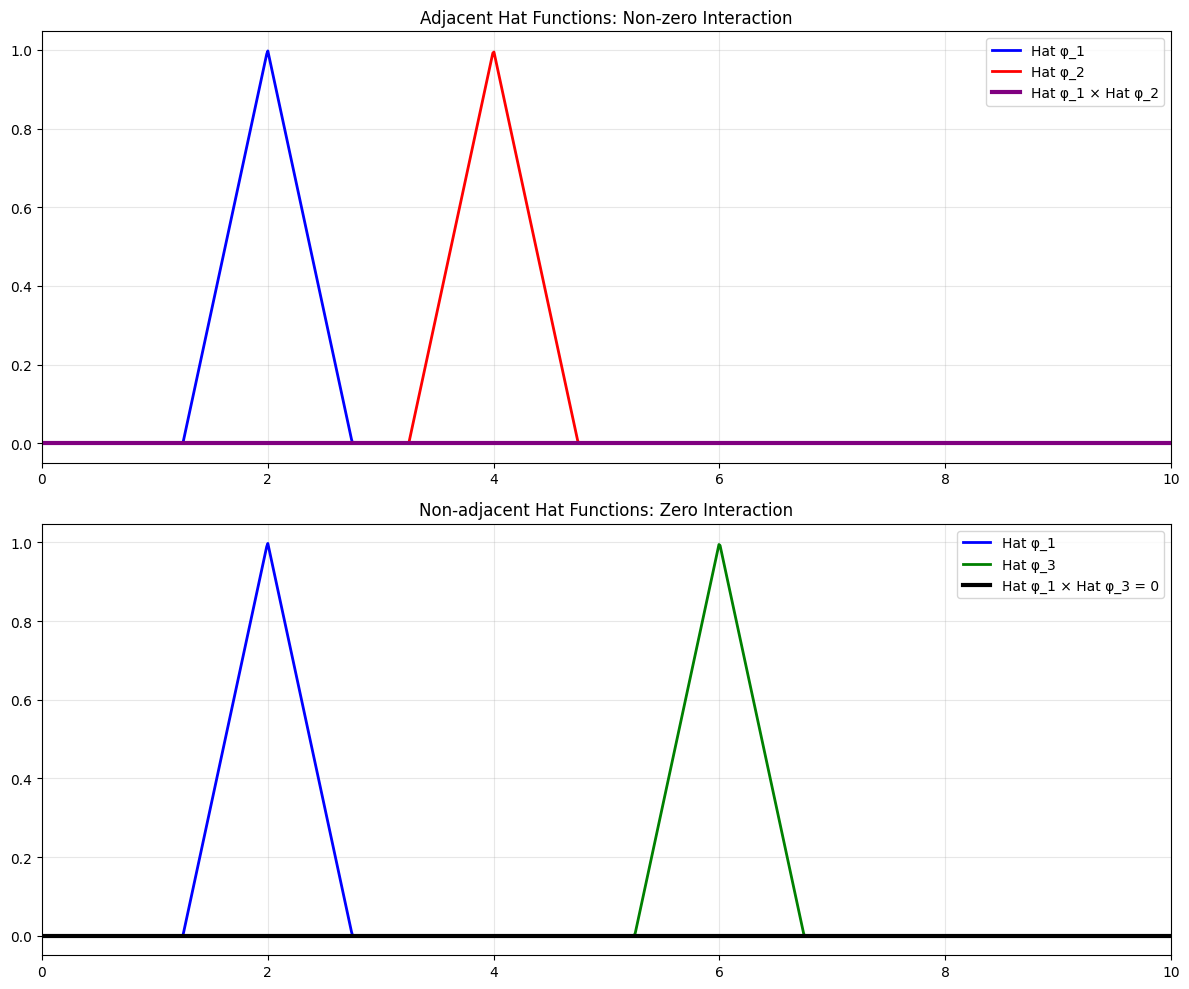


Inner product matrix (hat functions):
      Hat φ_1 Hat φ_2 Hat φ_3 Hat φ_4
Hat φ_1   0.500   0.000   0.000   0.000
Hat φ_2   0.000   0.500   0.000   0.000
Hat φ_3   0.000   0.000   0.500   0.000
Hat φ_4   0.000   0.000   0.000   0.500

Observations:
• Adjacent hat functions have non-zero inner products
• Non-adjacent hat functions have zero inner products
• This creates a sparse interaction pattern → efficient computations


In [20]:
# Example 6: Hat Function Interactions and Inner Products

# Demonstrate how compact support affects function interactions
print("Hat Function Interactions:")

# Test overlapping hat functions
hat1, hat2, hat3 = hat_functions[0], hat_functions[1], hat_functions[2]

# Multiplication creates intersection of supports
product_12 = hat1 * hat2  # Adjacent hat functions
product_13 = hat1 * hat3  # Non-adjacent hat functions

print(f"\nFunction multiplication (intersection of supports):")
print(f"  {hat1.name} support: [{hat1.support[0][0]:.2f}, {hat1.support[0][1]:.2f}]")
print(f"  {hat2.name} support: [{hat2.support[0][0]:.2f}, {hat2.support[0][1]:.2f}]")
print(f"  Product support: {product_12.support}")

print(f"\n  {hat1.name} support: [{hat1.support[0][0]:.2f}, {hat1.support[0][1]:.2f}]")
print(f"  {hat3.name} support: [{hat3.support[0][0]:.2f}, {hat3.support[0][1]:.2f}]")
print(f"  Product support: {product_13.support}")

# Visualize the interactions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

x_interaction = np.linspace(0, 10, 1000)

# Adjacent hat functions (overlapping)
ax1.plot(x_interaction, hat1.evaluate(x_interaction), 'b-', linewidth=2, label=hat1.name)
ax1.plot(x_interaction, hat2.evaluate(x_interaction), 'r-', linewidth=2, label=hat2.name)
ax1.plot(x_interaction, product_12.evaluate(x_interaction), 'purple', linewidth=3,
         label=f'{hat1.name} × {hat2.name}')

# Highlight interaction region
if product_12.support:
    support_a, support_b = product_12.support[0]
    ax1.axvspan(support_a, support_b, alpha=0.2, color='purple', label='Interaction region')

ax1.set_title('Adjacent Hat Functions: Non-zero Interaction', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 10)

# Non-adjacent hat functions (no overlap)
ax2.plot(x_interaction, hat1.evaluate(x_interaction), 'b-', linewidth=2, label=hat1.name)
ax2.plot(x_interaction, hat3.evaluate(x_interaction), 'g-', linewidth=2, label=hat3.name)
ax2.plot(x_interaction, product_13.evaluate(x_interaction), 'black', linewidth=3,
         label=f'{hat1.name} × {hat3.name} = 0')

ax2.set_title('Non-adjacent Hat Functions: Zero Interaction', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 10)

plt.tight_layout()
plt.show()

# Compute inner products to show sparsity pattern
print(f"\nInner product matrix (hat functions):")
print("     ", end="")
for j in range(len(hat_functions)):
    print(f"{hat_functions[j].name:>8}", end="")
print()

for i, hat_i in enumerate(hat_functions):
    print(f"{hat_i.name}", end="")
    for j, hat_j in enumerate(hat_functions):
        try:
            inner_prod = compact_space.inner_product(hat_i, hat_j)
            print(f"{inner_prod:8.3f}", end="")
        except:
            print(f"  {'N/A':>6}", end="")
    print()

print(f"\nObservations:")
print(f"• Adjacent hat functions have non-zero inner products")
print(f"• Non-adjacent hat functions have zero inner products")
print(f"• This creates a sparse interaction pattern → efficient computations")

## 5. Compute Inner Products and Norms

The L² inner product is defined as $⟨u,v⟩_{L²} = \int_a^b u(x)v(x) \, dx$.

Let's compute inner products and norms for our functions.

In [21]:
# Compute inner products between functions
inner_product_12 = space1.inner_product(func1, func2)
print(f"⟨func1, func2⟩_L² = {inner_product_12:.6f}")

inner_product_11 = space1.inner_product(func1, func1)
print(f"⟨func1, func1⟩_L² = {inner_product_11:.6f}")

# Compute L² norms (||u||² = ⟨u,u⟩)
norm_func1 = np.sqrt(inner_product_11)
norm_func2 = np.sqrt(space1.inner_product(func2, func2))
print(f"\n||func1||_L² = {norm_func1:.6f}")
print(f"||func2||_L² = {norm_func2:.6f}")

# Test orthogonality of basis functions
print(f"\nBasis orthogonality tests:")
basis_inner_01 = space1.inner_product(space1.basis_functions[0], space1.basis_functions[1])
basis_inner_02 = space1.inner_product(space1.basis_functions[0], space1.basis_functions[2])
basis_inner_12 = space1.inner_product(space1.basis_functions[1], space1.basis_functions[2])

print(f"⟨basis_0, basis_1⟩ = {basis_inner_01:.10f}")
print(f"⟨basis_0, basis_2⟩ = {basis_inner_02:.10f}")
print(f"⟨basis_1, basis_2⟩ = {basis_inner_12:.10f}")

# Verify that the basis functions have unit norm
for i, basis in enumerate(space1.basis_functions):
    basis_norm = np.sqrt(space1.inner_product(basis, basis))
    print(f"||basis_{i}||_L² = {basis_norm:.6f}")

⟨func1, func2⟩_L² = 0.353553
⟨func1, func1⟩_L² = 1.340000

||func1||_L² = 1.157584
||func2||_L² = 0.707107

Basis orthogonality tests:
⟨basis_0, basis_1⟩ = -0.0000000000
⟨basis_0, basis_2⟩ = -0.0000000000
⟨basis_1, basis_2⟩ = -0.0000000001
||basis_0||_L² = 1.000000
||basis_1||_L² = 1.000000
||basis_2||_L² = 1.000000
||basis_3||_L² = 1.000000
||basis_4||_L² = 1.000000


/disks/data/PhD/Inferences/pygeoinf/pygeoinf/interval/l2_functions.py:249: UserWarning: Point evaluation is not well-defined for general L² functions. Consider using a Sobolev space with s > 1/2 for point evaluation.
  warnings.warn(


## 6. Visualize Functions and Basis

Let's plot our basis functions and created L2 functions to see their behavior on the interval.

**Important Note**: L² functions don't have well-defined pointwise values mathematically, but we can plot their smooth representatives (if they exist) for visualization.

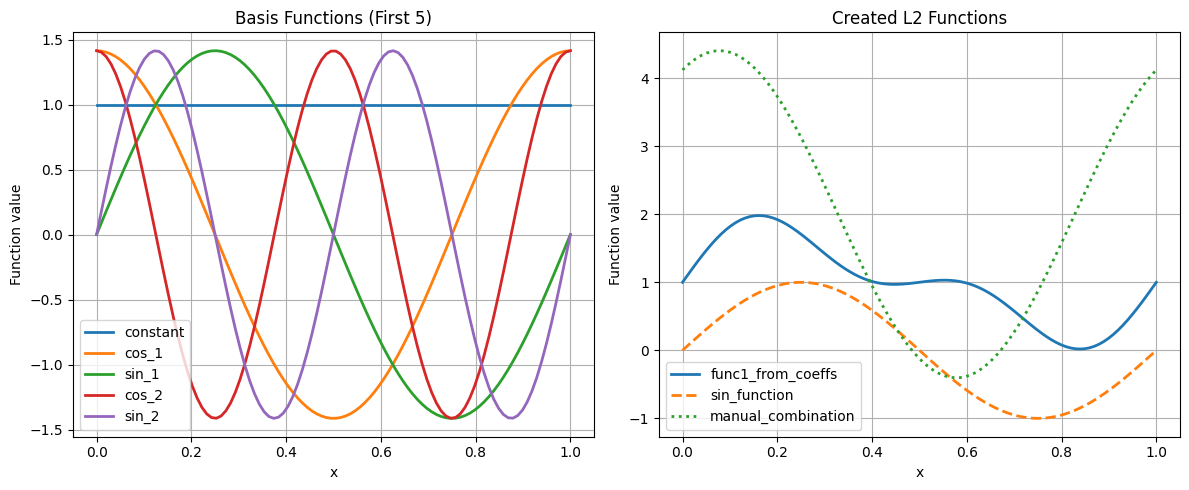

Note: These plots show the smooth representatives of L² functions.
Mathematically, L² functions don't have well-defined pointwise values!


In [25]:
# Create evaluation points for plotting
x = np.linspace(space1.interval[0], space1.interval[1], 100)

# Plot basis functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot first few basis functions
ax1.set_title("Basis Functions (First 5)")
for i, basis_func in enumerate(space1.basis_functions):
    # We'll evaluate the basis function (this gives a warning for L² functions, but works for plotting)
    try:
        y = basis_func.evaluate(x)  # Remove the suppress_warning parameter
        ax1.plot(x, y, label=f'{basis_func.name}', linewidth=2)
    except Exception as e:
        print(f"Could not plot basis function {i}: {e}")

ax1.set_xlabel('x')
ax1.set_ylabel('Function value')
ax1.legend()
ax1.grid(True)

# Plot our created functions
ax2.set_title("Created L2 Functions")
try:
    y1 = func1.evaluate(x)  # Remove suppress_warning parameter
    y2 = func2.evaluate(x)
    y3 = func3.evaluate(x)

    ax2.plot(x, y1, label=func1.name, linewidth=2)
    ax2.plot(x, y2, label=func2.name, linewidth=2, linestyle='--')
    ax2.plot(x, y3, label=func3.name, linewidth=2, linestyle=':')

except Exception as e:
    print(f"Error plotting functions: {e}")

ax2.set_xlabel('x')
ax2.set_ylabel('Function value')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print("Note: These plots show the smooth representatives of L² functions.")
print("Mathematically, L² functions don't have well-defined pointwise values!")

## 7. Work with Function Coefficients

The L2Space provides methods to convert between function representations and coefficient arrays:
- `to_components(u)`: Extract coefficients from a function
- `from_components(coeffs)`: Create a function from coefficients

Functions are created directly using the `L2Function` constructor, which provides a clean and explicit API.

In [26]:
# Extract coefficients from existing functions
coeffs_func1 = space1.to_components(func1)
coeffs_func2 = space1.to_components(func2)

print("Original coefficients for func1:", coeffs1)
print("Extracted coefficients for func1:", np.round(coeffs_func1, 6))
print("Match?", np.allclose(coeffs1, coeffs_func1))

print(f"\nExtracted coefficients for func2 (sin function):")
print(np.round(coeffs_func2, 6))

# Create new functions from coefficients
test_coeffs = [0.5, 1.0, 0.0, -0.8, 0.3]
func_from_coeffs = space1.from_components(test_coeffs)
func_from_coeffs.name = "reconstructed_function"

# Verify round-trip: coeffs -> function -> coeffs
test_extracted = space1.to_components(func_from_coeffs)
print(f"\nRound-trip test:")
print("Original coefficients:", test_coeffs)
print("Extracted coefficients:", np.round(test_extracted, 10))
print("Round-trip successful?", np.allclose(test_coeffs, test_extracted))

# Test coefficient manipulation
modified_coeffs = coeffs_func1 + 0.1 * coeffs_func2
func_modified = space1.from_components(modified_coeffs)
func_modified.name = "modified_combination"
print(f"\nCreated modified function: {func_modified.name}")

# Verify that coefficient operations correspond to function operations
func_direct = func1 + 0.1 * func2
func_direct.name = "direct_combination"

coeffs_modified = space1.to_components(func_modified)
coeffs_direct = space1.to_components(func_direct)

print("Coefficients from modified_coeffs:", np.round(coeffs_modified, 6))
print("Coefficients from direct operation:", np.round(coeffs_direct, 6))
print("Linear operations commute?", np.allclose(coeffs_modified, coeffs_direct))

Original coefficients for func1: [1.  0.  0.5 0.  0.3]
Extracted coefficients for func1: [1.  0.  0.5 0.  0.3]
Match? True

Extracted coefficients for func2 (sin function):
[-0.        0.        0.707107 -0.        0.      ]

Round-trip test:
Original coefficients: [0.5, 1.0, 0.0, -0.8, 0.3]
Extracted coefficients: [ 0.5  1.   0.  -0.8  0.3]
Round-trip successful? True

Created modified function: modified_combination
Coefficients from modified_coeffs: [ 1.       -0.        0.570711  0.        0.3     ]
Coefficients from direct operation: [ 1.       -0.        0.570711 -0.        0.3     ]
Linear operations commute? True
